<a href="https://colab.research.google.com/github/bobyuwono/Sign-Language-Game/blob/master/Sign_Language_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
test_dataset_url = 'https://raw.githubusercontent.com/bobyuwono/Sign-Language-Game/master/Dataset/sign_mnist_test.csv'
train_dataset_url = 'https://raw.githubusercontent.com/bobyuwono/Sign-Language-Game/master/Dataset/sign_mnist_train.csv'

df_test = pd.read_csv(test_dataset_url)
df_train = pd.read_csv(train_dataset_url)

In [3]:
df_test.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,142,144,147,150,153,156,159,160,162,164,165,166,166,167,167,168,168,168,167,73,80,89,104,117,126,132,136,140,143,146,...,108,186,189,190,193,193,194,194,195,195,195,195,89,106,116,127,136,145,151,163,159,154,152,144,129,100,78,64,115,186,187,189,192,193,194,194,194,195,195,194


taking labels from dataset

In [0]:
labels = df_train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Mengecek distribusi

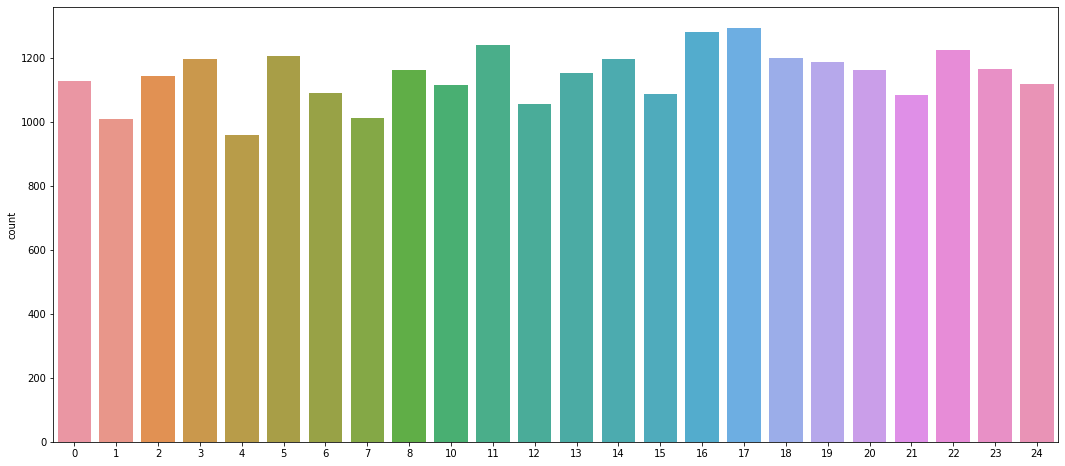

In [6]:
plt.figure(figsize = (18,8))
sns.countplot (x =labels)

In [7]:
#@title Dropping out label from dataframe
df_train.drop('label', axis=1, inplace=True )
df_train.head(6)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
5,161,168,172,173,178,184,189,193,196,202,206,208,212,214,217,219,220,222,226,227,227,228,231,231,231,230,231,233,163,169,171,174,179,185,190,194,198,203,208,211,...,70,71,73,69,64,56,51,56,41,216,255,255,186,189,191,197,205,211,216,219,232,205,147,137,118,99,79,75,78,77,76,74,68,62,53,55,48,238,255,255


In [0]:
train_images = df_train.values
train_images = np.array([np.reshape(i, newshape=(28,28)) for i in train_images])
train_images = np.array([i.flatten() for i in train_images])

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

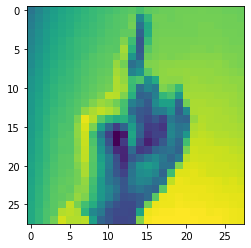

In [11]:
plt.imshow(train_images[0].reshape(28,28))

split train_dataset for testing and validation


*   x_train for training
*   x_test for validation


In [0]:
x_train, x_test, y_train, y_test = train_test_split( train_images, labels, test_size = 0.3, random_state=101)

Normalizing Data

In [0]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

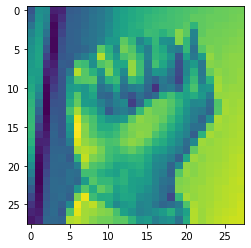

In [14]:
plt.imshow(x_train[0].reshape(28,28))

#Modelling

In [0]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten sudah dilakukan diatas
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(24, activation='softmax')                    
 ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3

In [0]:
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
history= model.fit(x_train, y_train, validation_data = (x_test, y_test),
                   epochs=20, 
                   batch_size=20 )

Epoch 1/20
961/961 [==============================] - 32s 33ms/step - loss: 0.8767 - accuracy: 0.7360 - val_loss: 0.1121 - val_accuracy: 0.9729
Epoch 2/20
961/961 [==============================] - 32s 34ms/step - loss: 0.0485 - accuracy: 0.9888 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoch 3/20
961/961 [==============================] - 34s 35ms/step - loss: 0.0081 - accuracy: 0.9990 - val_loss: 0.0022 - val_accuracy: 0.9999
Epoch 4/20
961/961 [==============================] - 33s 34ms/step - loss: 0.0294 - accuracy: 0.9922 - val_loss: 0.0195 - val_accuracy: 0.9949
Epoch 5/20
961/961 [==============================] - 33s 34ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 7.8363e-04 - val_accuracy: 1.0000
Epoch 6/20
961/961 [==============================] - 33s 34ms/step - loss: 3.4666e-04 - accuracy: 1.0000 - val_loss: 3.2129e-04 - val_accuracy: 1.0000
Epoch 7/20
961/961 [==============================] - 33s 34ms/step - loss: 1.8147e-04 - accuracy: 1.0000 - val_loss: 2.1995

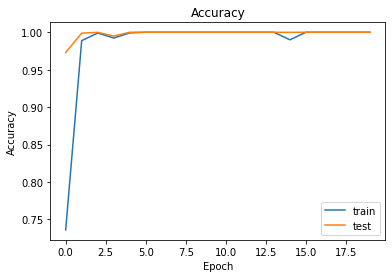

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.show()

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 95% accuracy so canceling training!")
      self.model.stop_training= True

#Testing with Test dataset

In [25]:
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,166,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,210,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,205,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [0]:
test_label = df_test['label']

df_test.drop('label', axis=1, inplace=True)

In [0]:
test_images = df_test.values
test_images = np.array([np.reshape(i ,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

lb = LabelBinarizer()
test_labels = lb.fit_transform(test_label)

test_images= test_images.reshape(test_images.shape[0],28,28,1)

In [30]:
test_images.shape

(7172, 28, 28, 1)

In [0]:
y_pred = model.predict(test_images)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8905465699944227